

<font color='red' size='5'> Exercise 1: Implement Decision Tree Classifier (Zoo Dataset)</font>
1. Importing Required Libraries Let's first load the required libraries.
2. Loading Data: Let's first load the required dataset using pandas read CSV function.
3. Feature Selection: Here, you need to divide given columns into two types of variables
dependent (or target variable) and independent variable (or feature variables).
4. Splitting Data: To understand model performance, dividing the dataset into a training set
and a test set is a good strategy.
• Let's split the dataset by using function train_test_split(). You need to pass 3
parameters features, target, and test_set size.
5. Building Decision Tree Model: Let's create a Decision Tree Model using Scikit-learn.
6. Evaluating Model: Let's estimate, how accurately the classifier or model can predict the
different classes.
7. Accuracy can be computed by comparing actual test set values and predicted values.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
csv_filename="zoo.data"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename, 
              names=["Animal", "Hair" , "Feathers" , "Eggs" , "Milk" , "Airborne",
                     "Aquatic" , "Predator" , "Toothed" , "Backbone", "Breathes" , "Venomous",
                     "Fins", "Legs", "Tail", "Domestic", "Catsize", "Type" ])

In [3]:
df

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
df.head(10)

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [5]:
df.tail(10)

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
91,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
92,tuna,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
93,vampire,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1
94,vole,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
95,vulture,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


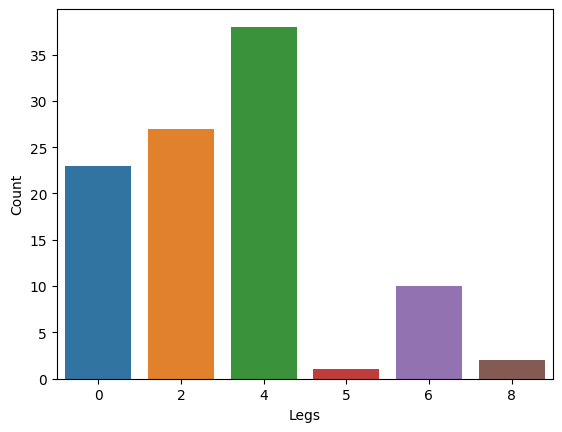

Legs
4    38
2    27
0    23
6    10
8     2
5     1
Name: count, dtype: int64

In [6]:
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
sns.countplot(x="Legs", data=df)
plt.xlabel("Legs")
plt.ylabel("Count")
plt.show()
df.loc[:,'Legs'].value_counts()



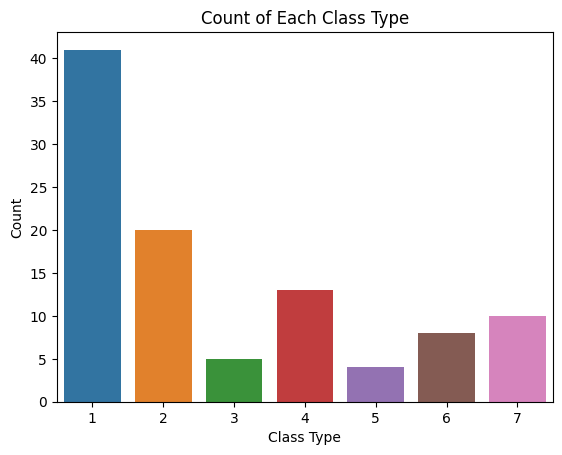

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Type', data=df)
plt.title("Count of Each Class Type")
plt.xlabel("Class Type")
plt.ylabel("Count")
plt.show()

In [8]:
df= df.drop('Animal',axis=1)

In [9]:
df.head()

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Type',axis=1)
Y= df['Type']

In [12]:
X

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [13]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: Type, Length: 101, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [15]:
len(X_train)

70

In [16]:
len(X_test)

31

In [17]:
X_train

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
36,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
40,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0
10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
30,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
32,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1
48,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0,1
73,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0


In [18]:
X_test

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize
82,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
71,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1
76,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0
62,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0
14,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0
16,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0
54,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0


In [19]:
y_train

97    6
36    1
40    6
10    1
30    6
     ..
38    4
32    1
48    1
73    4
47    1
Name: Type, Length: 70, dtype: int64

In [20]:
y_test

82    4
71    2
76    3
62    3
14    7
16    2
22    1
9     1
54    1
2     4
0     1
78    2
49    1
12    4
63    1
52    5
50    1
57    2
74    1
58    2
69    1
80    3
27    1
44    1
4     1
95    2
45    1
79    2
35    1
68    1
72    7
Name: Type, dtype: int64

In [35]:
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion='entropy')


In [36]:
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [37]:
y_test

82    4
71    2
76    3
62    3
14    7
16    2
22    1
9     1
54    1
2     4
0     1
78    2
49    1
12    4
63    1
52    5
50    1
57    2
74    1
58    2
69    1
80    3
27    1
44    1
4     1
95    2
45    1
79    2
35    1
68    1
72    7
Name: Type, dtype: int64

In [38]:
y=model.predict(X_test)
y

array([4, 2, 1, 3, 7, 2, 1, 1, 1, 4, 1, 2, 1, 4, 3, 5, 1, 2, 1, 2, 1, 3,
       1, 1, 1, 2, 1, 2, 1, 1, 3], dtype=int64)

In [39]:
model.score(X_train, y_train)

1.0

In [40]:
model.score(X_test, y_test)

0.9032258064516129

In [41]:
df.loc[:,'Type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

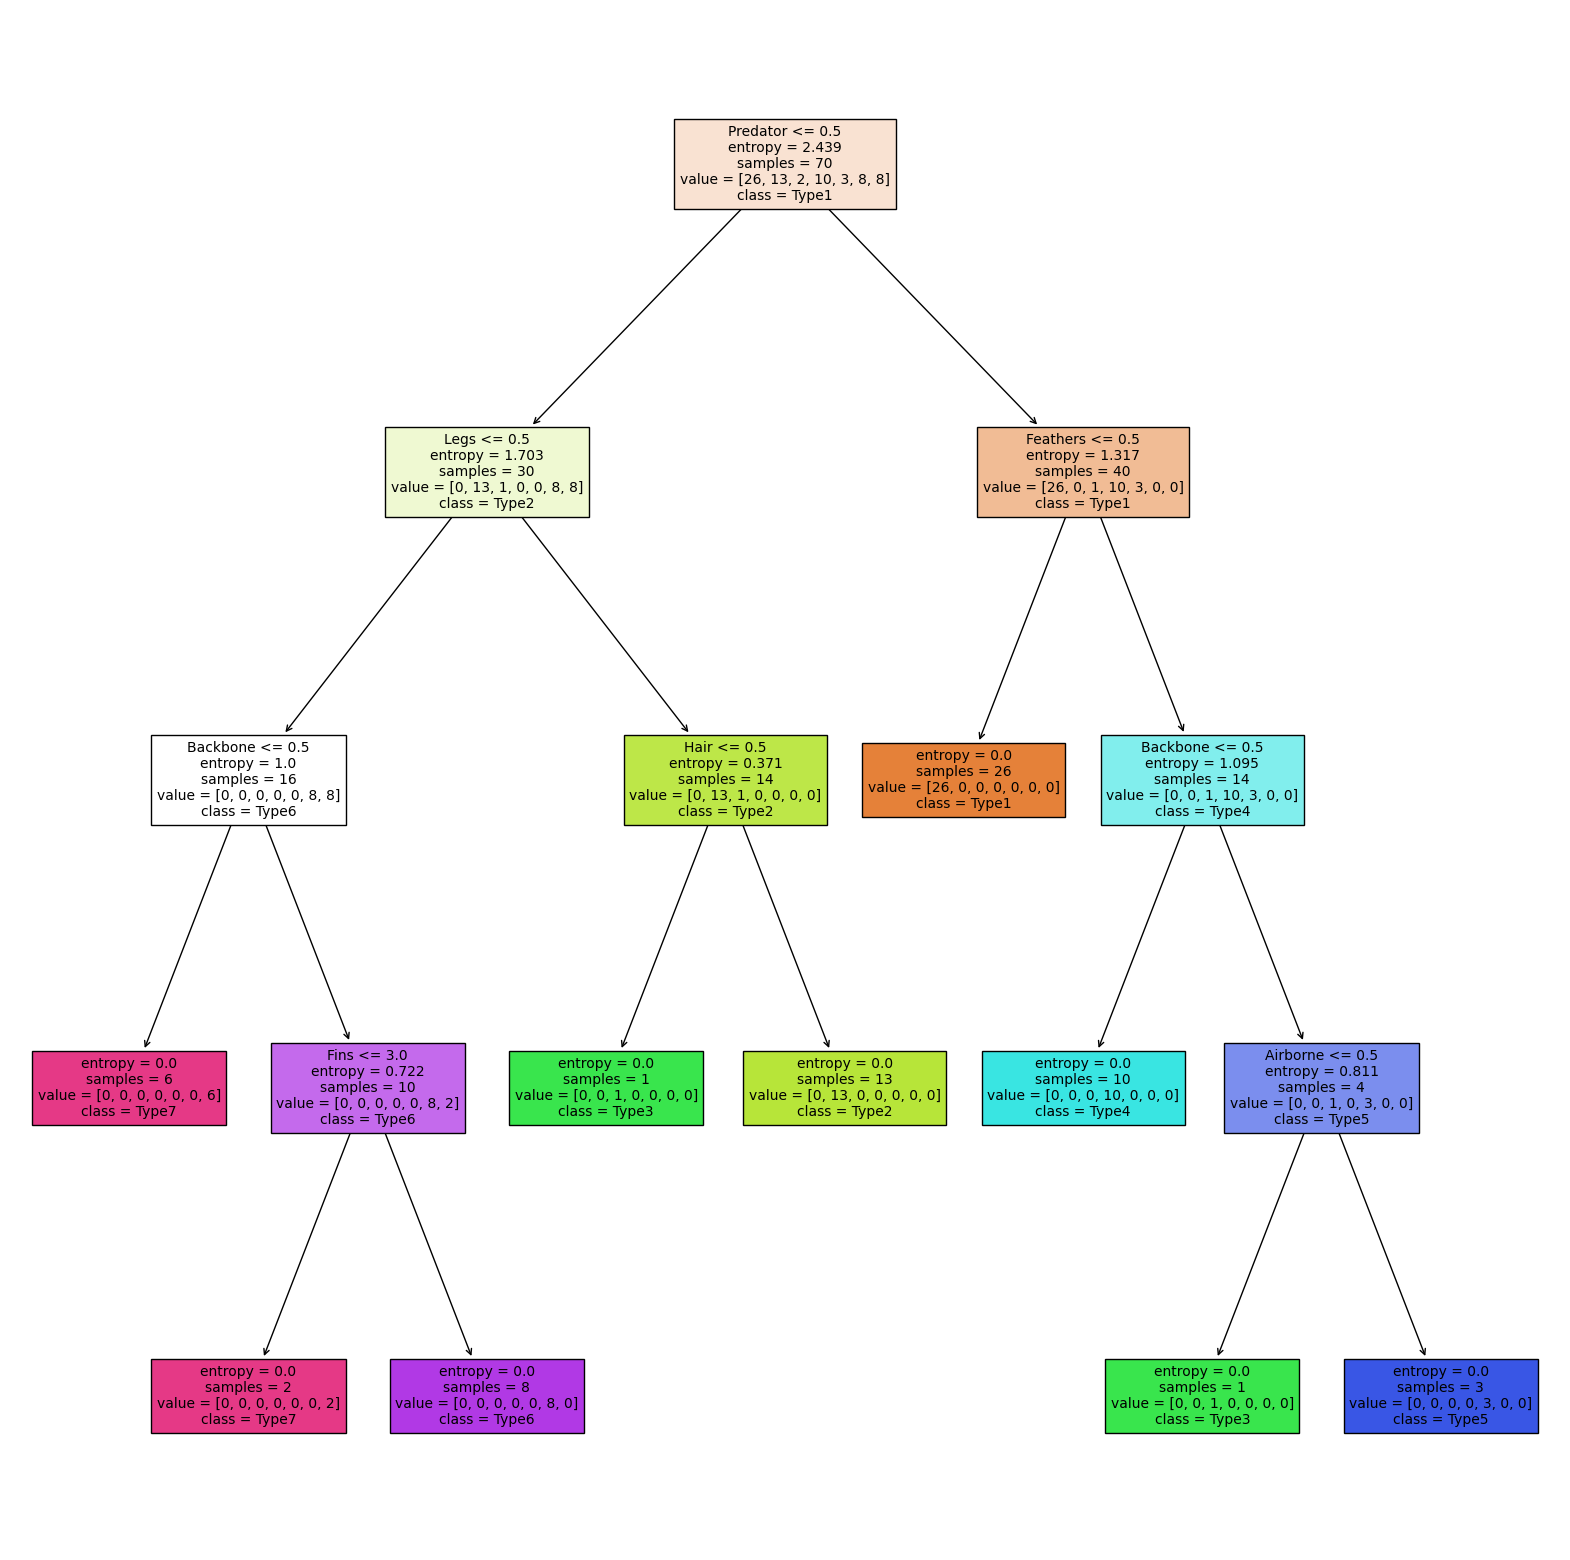

In [47]:
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming you have a trained decision tree model named 'model'
feature_names = ["Animal", "Hair", "Feathers", "Eggs", "Milk", "Airborne", "Aquatic", "Predator", "Toothed", "Backbone", "Breathes", "Venomous", "Fins", "Legs", "Tail", "Domestic", "Catsize"]
class_names = ["Type1", "Type2", "Type3", "Type4", "Type5", "Type6", "Type7"]
plt.figure(figsize=(20, 20))
tree.plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True, fontsize=10)
plt.show()

In [48]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_13 <= 0.50
|   |   |--- feature_9 <= 0.50
|   |   |   |--- class: 7
|   |   |--- feature_9 >  0.50
|   |   |   |--- feature_12 <= 3.00
|   |   |   |   |--- class: 7
|   |   |   |--- feature_12 >  3.00
|   |   |   |   |--- class: 6
|   |--- feature_13 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 3
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 2
|--- feature_7 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- feature_9 <= 0.50
|   |   |   |--- class: 4
|   |   |--- feature_9 >  0.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- class: 3
|   |   |   |--- feature_5 >  0.50
|   |   |   |   |--- class: 5

